# **Exploratory Data Analysis (EDA)**

---



# **Import Library**

---



In [ ]:
# Import library utama
import pandas as pd              # Untuk manipulasi data dalam bentuk DataFrame
import numpy as np               # Untuk operasi numerik dan array

# Visualisasi data
import matplotlib.pyplot as plt  # Untuk membuat grafik dan visualisasi dasar
import seaborn as sns            # Untuk visualisasi statistik yang lebih menarik dan informatif

# Preprocessing data
from sklearn.impute import SimpleImputer              # Untuk menangani missing value (mengisi nilai yang hilang)
from sklearn.preprocessing import LabelEncoder        # Untuk mengubah data kategorikal menjadi angka
from sklearn.preprocessing import StandardScaler      # Untuk menstandarisasi fitur numerik (mean=0, std=1)

# Pembagian data
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan data uji

# Model klasifikasi
from sklearn.tree import DecisionTreeClassifier       # Algoritma Decision Tree untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier   # Random Forest, gabungan banyak Decision Tree
from sklearn.linear_model import LogisticRegression   # Regresi logistik untuk klasifikasi
from sklearn.neighbors import KNeighborsClassifier    # KNN, klasifikasi berdasarkan tetangga terdekat
from sklearn.naive_bayes import GaussianNB            # Naive Bayes untuk data numerik (Gaussian)
from sklearn.svm import SVC                           # Support Vector Machine untuk klasifikasi

# Evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Digunakan untuk mengukur performa model (akurasi, presisi, recall, F1, laporan klasifikasi)

# Penanganan data tidak seimbang
from imblearn.over_sampling import SMOTE              # Teknik SMOTE untuk oversampling data minoritas

# Utilitas tambahan
from collections import Counter                       # Untuk menghitung frekuensi elemen, berguna saat cek distribusi kelas


# **Import Dataset**

In [ ]:
# Membaca file dataset ObesityDataSet.csv dan menyimpannya ke dalam DataFrame bernama df
# Ganti path jika file berada di lokasi lain
df = pd.read_csv('/content/ObesityDataSet.csv')


In [ ]:
# Menampilkan 5 baris pertama dari dataset untuk melihat gambaran awal data
df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


**Penjelasan :**

Kode ini digunakan untuk melihat gambaran awal struktur dan isi data, termasuk nama kolom, tipe data, dan beberapa nilai awal di setiap kolom. Cocok untuk pengecekan awal setelah membaca file CSV.

In [ ]:
# Menampilkan informasi umum tentang dataset, seperti jumlah baris, kolom, tipe data, dan jumlah data non-null
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

**Penjelasan :**

df.info() sangat berguna untuk mengetahui struktur dataset, melihat apakah ada missing value, serta memahami tipe data setiap kolom. Ini membantu dalam tahap eksplorasi data awal.

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik, seperti mean, std, min, max, dan quartile
df.describe()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


**Penjelasan :**

df.describe() digunakan untuk melihat ringkasan statistik yang memberikan gambaran distribusi data pada kolom numerik, termasuk rata-rata, standar deviasi, nilai minimum, maksimum, dan nilai kuartil. Ini penting untuk memahami karakteristik data sebelum pemodelan.

# **Mendeteksi SMOTE**

---



NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


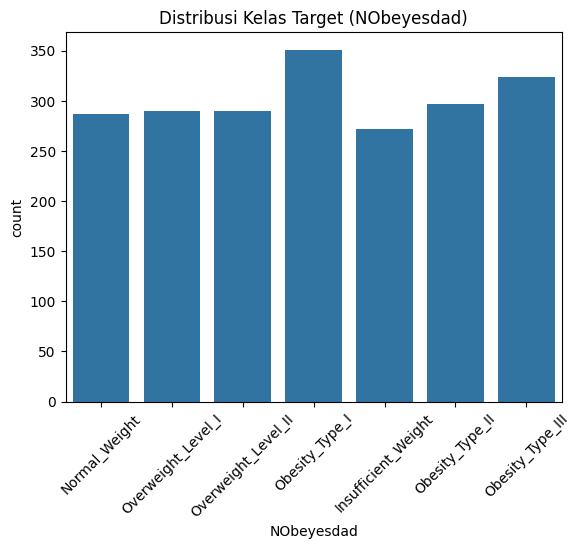

In [ ]:
# Menampilkan jumlah data untuk setiap kelas pada kolom target 'NObeyesdad' sebelum dilakukan oversampling (SMOTE)
print(df['NObeyesdad'].value_counts())

# Membuat visualisasi distribusi kelas target menggunakan countplot
sns.countplot(data=df, x='NObeyesdad')
plt.xticks(rotation=45)  # Memutar label sumbu x agar tidak saling tumpang tindih
plt.title('Distribusi Kelas Target (NObeyesdad)')  # Judul grafik
plt.show()  # Menampilkan grafik


**Penjelasan :**

Kode ini digunakan untuk mengetahui jumlah data pada tiap kelas obesitas (target) sebelum dilakukan SMOTE. Visualisasi ini sangat penting untuk mengidentifikasi apakah terjadi ketidakseimbangan kelas (class imbalance) yang bisa memengaruhi kinerja model klasifikasi.

# **Mendeteksi Outlayers**

---



In [ ]:
# Tampilkan kolom bertipe numerik (int atau float)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Menyeleksi kolom bertipe numerik
print("Kolom numerik:")  # Menampilkan judul output
print(numeric_cols)      # Menampilkan daftar nama kolom numerik


Kolom numerik:
Index([], dtype='object')


**Penjelasan:**

Kode ini berguna untuk mengetahui kolom-kolom dalam dataset yang bertipe numerik, yang biasanya dibutuhkan untuk analisis statistik, visualisasi, atau pemodelan machine learning seperti scaling dan deteksi outlier.

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)             # Kuartil pertama (25%)
    Q3 = data[column].quantile(0.75)             # Kuartil ketiga (75%)
    IQR = Q3 - Q1                                # Rentang antar kuartil (IQR)
    lower = Q1 - 1.5 * IQR                       # Batas bawah untuk outlier
    upper = Q3 + 1.5 * IQR                       # Batas atas untuk outlier
    outliers = data[(data[column] < lower) | (data[column] > upper)]  # Baris yang merupakan outlier
    return outliers                              # Mengembalikan data outlier


**Penjelasan :**

Fungsi ini mendeteksi outlier menggunakan metode IQR (Interquartile Range) dengan batas 1.5 kali IQR di bawah Q1 dan di atas Q3. Baris data yang nilai pada kolom tertentu berada di luar batas ini dikategorikan sebagai outlier.

In [ ]:
for col in numeric_cols:  # Looping untuk setiap kolom numerik
    outliers = detect_outliers_iqr(df, col)  # Deteksi outlier pada kolom tersebut menggunakan metode IQR
    print(f"\nJumlah outlier pada kolom '{col}': {len(outliers)}")  # Tampilkan jumlah outlier
    if not outliers.empty:  # Jika ada outlier yang terdeteksi
        print(outliers[[col]])  # Tampilkan nilai outlier pada kolom tersebut


**Penjelasan :**

Kode ini membantu mengidentifikasi outlier di setiap kolom numerik dalam dataset.

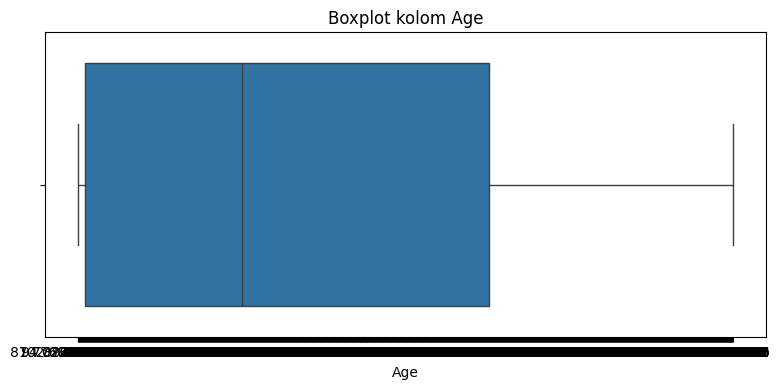

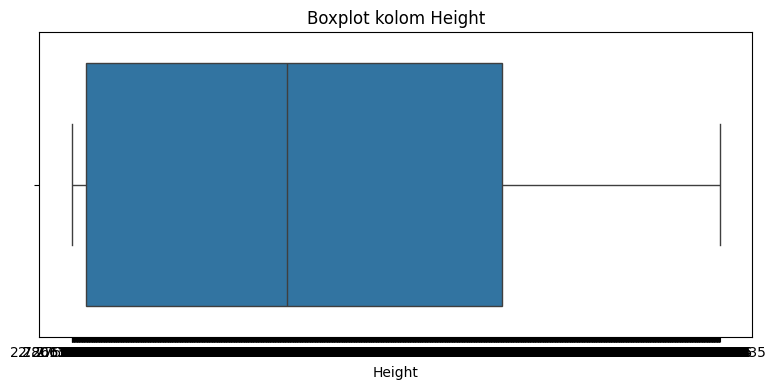

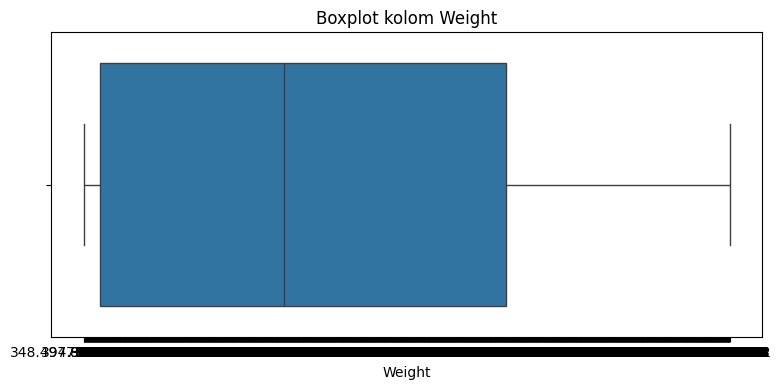

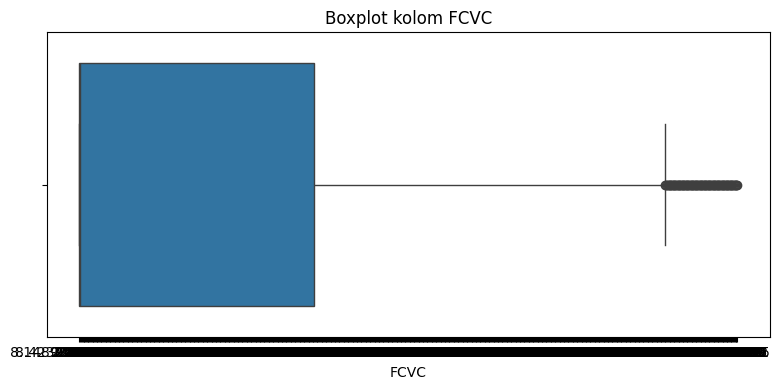

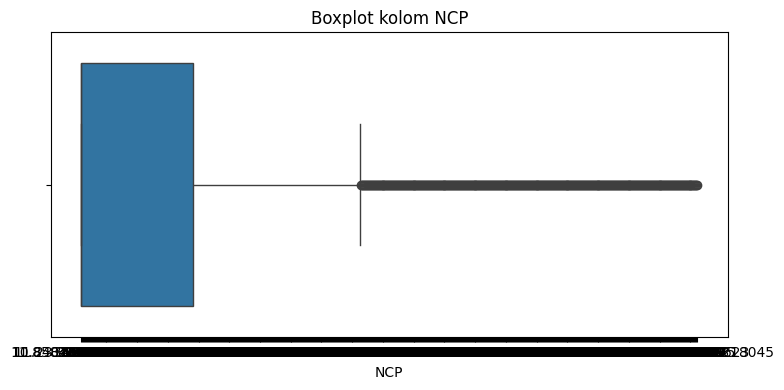

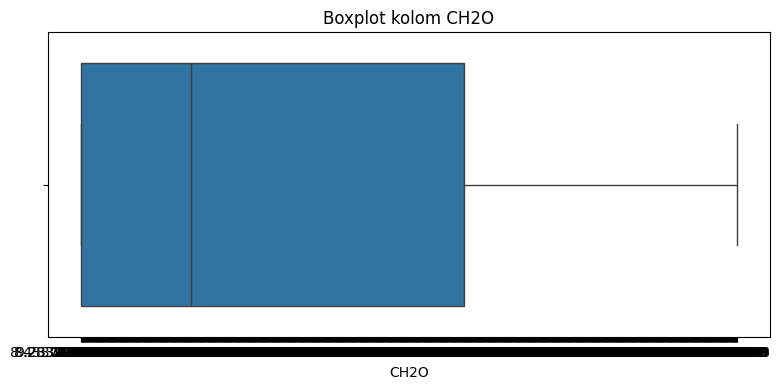

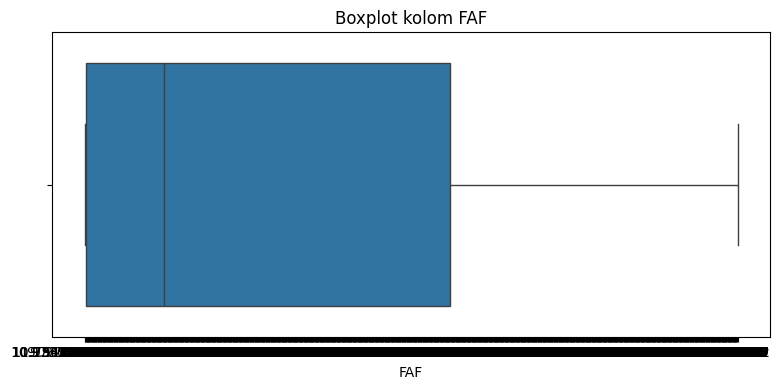

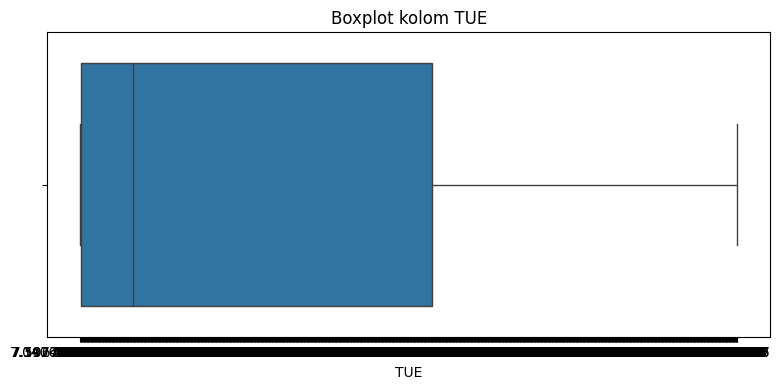

In [ ]:
# Daftar kolom numerik berdasarkan dataset Obesity
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']  # Kolom numerik untuk divisualisasikan

# Plot boxplot untuk setiap kolom numerik
for col in numeric_cols:  # Looping setiap kolom numerik
    plt.figure(figsize=(8, 4))           # Ukuran figure
    sns.boxplot(x=df[col])               # Membuat boxplot untuk kolom
    plt.title(f"Boxplot kolom {col}")    # Judul grafik sesuai nama kolom
    plt.xlabel(col)                      # Label sumbu x
    plt.tight_layout()                   # Menata layout agar tidak terpotong
    plt.show()                           # Menampilkan grafik


**Penjelasan:**

Boxplot digunakan untuk melihat distribusi data dan mendeteksi outlier secara visual pada masing-masing kolom numerik.

# **Preprocessing**

# **Mengatasi Missing Values**

---



In [ ]:
# Cek jumlah missing value per kolom
print("Jumlah missing value per kolom:")   # Menampilkan judul output
print(df.isnull().sum())                   # Menampilkan jumlah nilai yang hilang (null) di setiap kolom


Jumlah missing value per kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


**Penjelasan:**

Kode ini digunakan untuk mengetahui apakah terdapat data yang hilang (missing values) dalam setiap kolom dataset.

In [ ]:
# Tangani kolom numerik: isi dengan median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Pilih kolom bertipe numerik
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())  # Isi missing value dengan nilai median masing-masing kolom

# Tangani kolom kategorikal: isi dengan modus
cat_cols = df.select_dtypes(include=['object']).columns  # Pilih kolom bertipe kategorikal (object/string)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Isi missing value dengan nilai modus (nilai yang paling sering muncul)


**Penjelasan:**

- Median digunakan untuk data numerik karena lebih tahan terhadap outlier.

- Modus digunakan untuk data kategorikal karena menunjukkan kategori yang paling umum.

In [ ]:
# Pastikan tidak ada missing value lagi
print("Sisa missing value setelah ditangani:")  # Menampilkan pesan pengecekan akhir
print(df.isnull().sum())                        # Menampilkan jumlah missing value per kolom setelah proses imputasi


Sisa missing value setelah ditangani:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


**Penjelasan:**

Kode ini digunakan untuk memverifikasi bahwa semua missing value sudah berhasil diatasi dan dataset siap digunakan untuk analisis atau modeling.

# **Menangani SMOTE**

---



In [ ]:
# Misalnya target kolom adalah 'NObeyesdad'
X = df.drop('NObeyesdad', axis=1)  # X adalah fitur (semua kolom kecuali kolom target)
y = df['NObeyesdad']               # y adalah label atau target (kolom yang ingin diprediksi)


**Penjelasan:**

Kode ini memisahkan fitur (X) dan target (y), yang merupakan langkah penting sebelum melakukan pelatihan model machine learning.

In [ ]:
# Encoding data kategorik jika ada
X = pd.get_dummies(X, drop_first=True)  # Mengubah kolom kategorikal menjadi numerik dengan One-Hot Encoding, drop_first untuk menghindari multikolinearitas
X = X.astype(float)                     # Mengubah semua kolom menjadi tipe float agar kompatibel dengan model machine learning


**Penjelasan:**

One-Hot Encoding diperlukan agar model dapat memproses fitur kategorikal, dan astype(float) memastikan semua data dalam format numerik yang sesuai.

In [ ]:
# Split dulu agar tidak ada data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y,        # Membagi data fitur dan target menjadi data latih dan data uji dengan proporsi label yang seimbang
    test_size=0.2,           # 20% data digunakan untuk pengujian, 80% untuk pelatihan
    random_state=42          # Menetapkan seed agar hasil split konsisten
)


**Penjelasan:**

Langkah ini penting untuk menghindari data leakage, yaitu ketika informasi dari data uji ikut masuk ke pelatihan model, yang bisa menyebabkan hasil evaluasi tidak akurat.

In [ ]:
# Terapkan SMOTE
smote = SMOTE(random_state=42)                       # Inisialisasi objek SMOTE dengan seed random
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # Menyeimbangkan data latih dengan menambahkan sampel dari kelas minoritas


**Penjelasan:**

SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk mengatasi masalah data tidak seimbang dengan membuat data sintetis dari kelas minoritas agar model tidak bias.

In [ ]:
# Buat DataFrame dari hasil SMOTE untuk visualisasi
df_resampled = pd.DataFrame(X_resampled)  # Mengubah data hasil SMOTE menjadi DataFrame
df_resampled['label'] = y_resampled       # Menambahkan kolom 'label' sebagai target dari data hasil resampling


<ipython-input-172-2484854124>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['label'] = y_resampled       # Menambahkan kolom 'label' sebagai target dari data hasil resampling


**Penjelasan:**

Langkah ini dilakukan agar hasil dari SMOTE bisa lebih mudah dianalisis atau divisualisasikan, karena sudah dalam bentuk DataFrame seperti data awal.

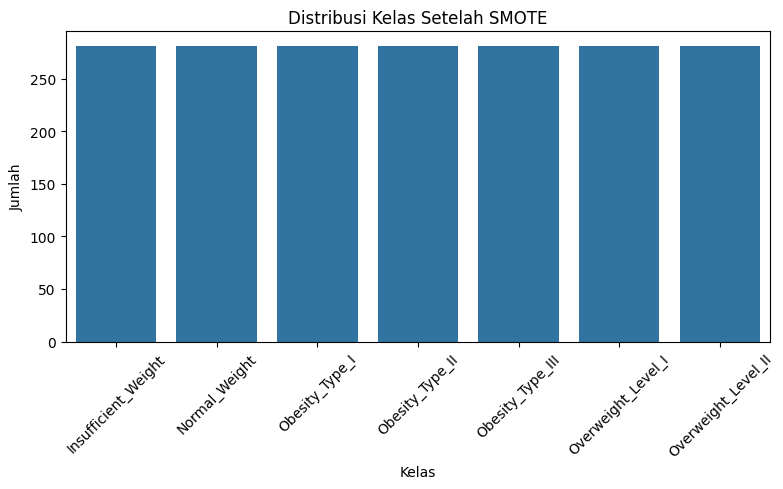

In [ ]:
# Plot distribusi kelas setelah SMOTE
plt.figure(figsize=(8, 5))  # Mengatur ukuran plot
sns.countplot(              # Membuat plot jumlah data per kelas setelah SMOTE
    data=df_resampled,
    x='label',
    order=sorted(df_resampled['label'].unique())  # Mengurutkan label agar tampil rapi
)
plt.title('Distribusi Kelas Setelah SMOTE')  # Judul grafik
plt.xlabel('Kelas')                          # Label sumbu X
plt.ylabel('Jumlah')                         # Label sumbu Y
plt.xticks(rotation=45)                      # Memutar label X agar tidak bertumpuk
plt.tight_layout()                           # Menata tata letak grafik
plt.show()                                   # Menampilkan grafik


**Penjelasan:**

Grafik ini digunakan untuk memastikan bahwa distribusi kelas setelah SMOTE sudah seimbang, sehingga model tidak lagi bias terhadap kelas mayoritas.

# **Mengecek Outlayer**

---



In [ ]:
# Pilih hanya kolom numerik (float atau int)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Menyeleksi dan mengubah kolom numerik menjadi list
print("Kolom numerik asli:", numeric_cols)  # Menampilkan daftar nama kolom numerik


Kolom numerik asli: []


**Penjelasan:**

Langkah ini berguna untuk memfokuskan analisis atau preprocessing hanya pada data numerik, yang biasanya diperlukan dalam banyak teknik analisis statistik atau machine learning.

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)                   # Kuartil pertama (Q1) dari kolom
    Q3 = df[column].quantile(0.75)                   # Kuartil ketiga (Q3) dari kolom
    IQR = Q3 - Q1                                    # Rentang antar kuartil (IQR)
    lower_bound = Q1 - 1.5 * IQR                     # Batas bawah untuk outlier
    upper_bound = Q3 + 1.5 * IQR                     # Batas atas untuk outlier
    return df[(df[column] >= lower_bound) &
              (df[column] <= upper_bound)]           # Mengembalikan data yang berada dalam rentang normal (tanpa outlier)


**Penjelasan:**

Fungsi ini digunakan untuk menghapus outlier dari sebuah kolom numerik dalam DataFrame dengan metode IQR, menjaga hanya data yang berada dalam batas bawah dan atas.

In [ ]:
for col in numeric_cols:                        # Loop melalui setiap kolom numerik
    before = len(df)                            # Simpan jumlah baris sebelum outlier dihapus
    df = remove_outliers_iqr(df, col)           # Hapus outlier dari kolom menggunakan fungsi IQR
    after = len(df)                             # Simpan jumlah baris setelah outlier dihapus
    print(f"{col}: removed {before - after} outliers")  # Tampilkan jumlah outlier yang dihapus pada kolom tersebut


**Penjelasan:**

Kode ini secara bertahap menghapus outlier dari setiap kolom numerik dalam dataset dan mencetak jumlah data yang dihapus, sehingga kamu bisa memantau dampaknya terhadap ukuran dataset.

In [ ]:
print("Jumlah data setelah hapus outlier:", df.shape)  # Menampilkan jumlah baris dan kolom data setelah proses penghapusan outlier


Jumlah data setelah hapus outlier: (2111, 17)


**Penjelasan:**

df.shape mengembalikan tuple (jumlah_baris, jumlah_kolom), sehingga kamu bisa melihat seberapa banyak data yang tersisa setelah outlier dihapus.

# **Korelasi numerik dan headmap**

---



In [ ]:
# Ambil hanya kolom numerik dari DataFrame hasil SMOTE
df_resampled = pd.DataFrame(X_resampled)  # Mengubah hasil X_resampled (array) menjadi DataFrame
df_resampled['label'] = y_resampled       # Menambahkan kolom 'label' sebagai target dari hasil resampling


<ipython-input-178-1233629334>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['label'] = y_resampled       # Menambahkan kolom 'label' sebagai target dari hasil resampling


**Penjelasan :**

Langkah ini menggabungkan fitur dan label hasil SMOTE ke dalam satu DataFrame agar memudahkan proses analisis, visualisasi, atau pelatihan model berikutnya.

In [ ]:
print(df.dtypes)  # Menampilkan tipe data (data types) dari setiap kolom dalam DataFrame


Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


**Penjelasan :**

Digunakan untuk mengetahui jenis tipe data tiap kolom (seperti int64, float64, atau object) agar dapat menentukan metode preprocessing yang tepat (misalnya encoding untuk tipe object, scaling untuk tipe numerik).

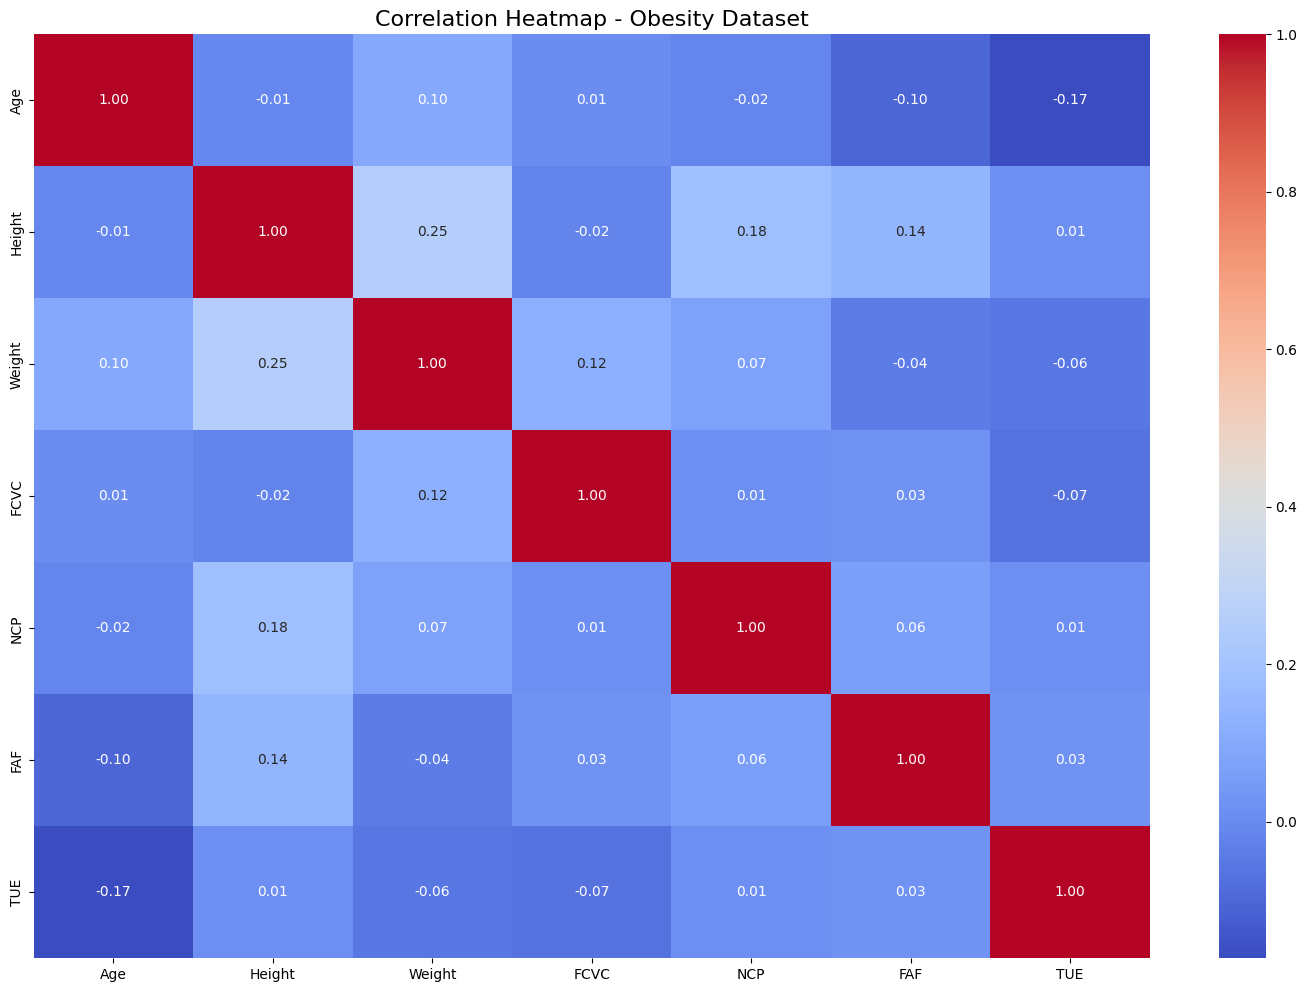

In [ ]:
# Konversi kolom numerik (yang awalnya mungkin terbaca sebagai object/string)
cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'FAF', 'TUE']  # Daftar kolom yang seharusnya numerik
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Mengonversi ke numerik, jika gagal akan menjadi NaN

# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Memilih semua kolom bertipe numerik dari DataFrame

# Cek apakah sudah ada kolom numerik
if not numerical_df.empty:  # Jika DataFrame tidak kosong
    plt.figure(figsize=(18, 12))  # Ukuran figure untuk heatmap
    sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')  # Membuat heatmap korelasi antar fitur numerik
    plt.title("Correlation Heatmap - Obesity Dataset", fontsize=16)  # Judul grafik
    plt.show()  # Menampilkan heatmap
else:
    print("Tidak ada kolom numerik yang tersedia untuk heatmap.")  # Pesan jika semua kolom gagal dikonversi atau tidak ada kolom numerik


**Penjelasan :**

- Bagian ini memastikan bahwa kolom yang seharusnya numerik (tapi mungkin terbaca sebagai string) dikonversi ke format numerik.

- Setelah itu, dibuat heatmap korelasi antar kolom numerik untuk memahami hubungan antar fitur dalam dataset obesitas.

# **Compairing**

---



# **Pemodelan**

Akurasi Decision Tree: 0.7044917257683215
                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.85      0.79        54
      Normal_Weight       0.62      0.55      0.58        58
     Obesity_Type_I       0.61      0.66      0.63        70
    Obesity_Type_II       0.75      0.78      0.76        60
   Obesity_Type_III       0.97      0.95      0.96        65
 Overweight_Level_I       0.57      0.50      0.53        58
Overweight_Level_II       0.64      0.62      0.63        58

           accuracy                           0.70       423
          macro avg       0.70      0.70      0.70       423
       weighted avg       0.70      0.70      0.70       423



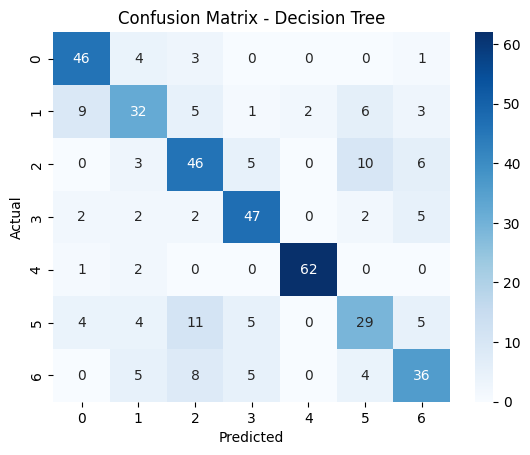

In [ ]:
tree = DecisionTreeClassifier(random_state=42)       # Inisialisasi model Decision Tree dengan random state agar hasil konsisten
tree.fit(X_resampled, y_resampled)                   # Melatih model dengan data latih hasil SMOTE
y_pred_tree = tree.predict(X_test)                   # Memprediksi data uji menggunakan model Decision Tree

# Evaluasi performa model
print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_tree))  # Menampilkan skor akurasi
print(classification_report(y_test, y_pred_tree))                      # Menampilkan metrik evaluasi: precision, recall, f1-score

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree),   # Membuat confusion matrix sebagai heatmap
            annot=True, fmt='d', cmap='Blues')       # Menampilkan angka, format integer, warna biru
plt.title("Confusion Matrix - Decision Tree")         # Judul grafik
plt.xlabel("Predicted")                               # Label sumbu X
plt.ylabel("Actual")                                  # Label sumbu Y
plt.show()                                            # Menampilkan grafik


**Penjelasan :**

Kode ini melatih model Decision Tree pada data hasil oversampling (SMOTE), kemudian mengevaluasi performanya dengan akurasi, classification report, dan confusion matrix untuk melihat seberapa baik model mengklasifikasi data obesitas.

Akurasi Random Forest: 0.7683215130023641
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.72      0.81        54
      Normal_Weight       0.66      0.95      0.78        58
     Obesity_Type_I       0.64      0.69      0.66        70
    Obesity_Type_II       0.67      0.93      0.78        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.90      0.47      0.61        58
Overweight_Level_II       0.78      0.62      0.69        58

           accuracy                           0.77       423
          macro avg       0.80      0.77      0.76       423
       weighted avg       0.80      0.77      0.76       423



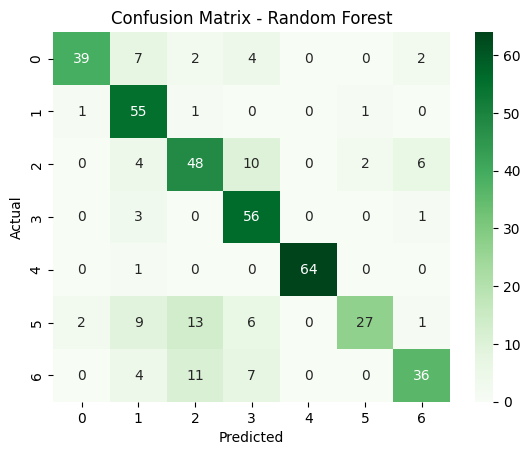

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import model Random Forest

rf = RandomForestClassifier(random_state=42)         # Inisialisasi model Random Forest
rf.fit(X_resampled, y_resampled)                     # Melatih model menggunakan data hasil SMOTE
y_pred_rf = rf.predict(X_test)                       # Memprediksi kelas dari data uji

# Evaluasi performa model
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))   # Menampilkan nilai akurasi
print(classification_report(y_test, y_pred_rf))                      # Menampilkan metrik evaluasi: precision, recall, f1-score

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf),     # Membuat heatmap dari confusion matrix
            annot=True, fmt='d', cmap='Greens')      # Menampilkan angka, format integer, menggunakan colormap hijau
plt.title("Confusion Matrix - Random Forest")         # Judul grafik
plt.xlabel("Predicted")                               # Label sumbu X
plt.ylabel("Actual")                                  # Label sumbu Y
plt.show()                                            # Menampilkan grafik


**Penjelasan :**

Kode ini melatih model Random Forest, memprediksi hasil pada data uji, dan menilai performa model melalui akurasi, classification report, dan confusion matrix. Random Forest biasanya lebih akurat daripada Decision Tree karena merupakan ensemble dari banyak pohon.

Akurasi Logistic Regression: 0.6619385342789598
                     precision    recall  f1-score   support

Insufficient_Weight       0.71      0.59      0.65        54
      Normal_Weight       0.73      0.78      0.75        58
     Obesity_Type_I       0.49      0.51      0.50        70
    Obesity_Type_II       0.65      0.93      0.77        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.47      0.47      0.47        58
Overweight_Level_II       0.57      0.34      0.43        58

           accuracy                           0.66       423
          macro avg       0.66      0.66      0.65       423
       weighted avg       0.66      0.66      0.65       423



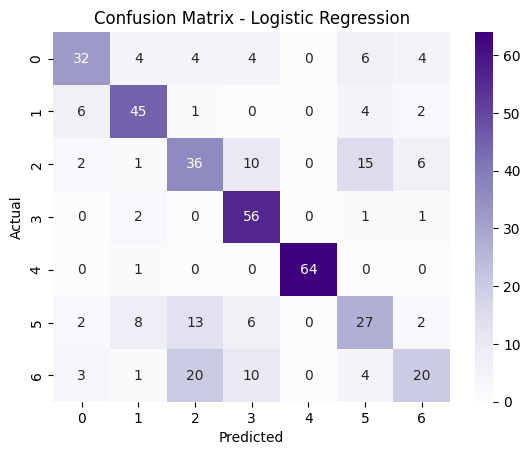

In [ ]:
from sklearn.linear_model import LogisticRegression  # Import model Logistic Regression

logreg = LogisticRegression(max_iter=1000, random_state=42)  # Inisialisasi model dengan maksimum iterasi 1000
logreg.fit(X_resampled, y_resampled)                        # Melatih model menggunakan data hasil SMOTE
y_pred_log = logreg.predict(X_test)                         # Memprediksi kelas data uji

# Evaluasi performa model
print("Akurasi Logistic Regression:", accuracy_score(y_test, y_pred_log))  # Menampilkan akurasi prediksi
print(classification_report(y_test, y_pred_log))                           # Menampilkan precision, recall, dan f1-score

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log),           # Membuat heatmap dari confusion matrix
            annot=True, fmt='d', cmap='Purples')            # Menampilkan nilai dalam format integer, warna ungu
plt.title("Confusion Matrix - Logistic Regression")         # Judul grafik
plt.xlabel("Predicted")                                     # Label sumbu X
plt.ylabel("Actual")                                        # Label sumbu Y
plt.show()                                                  # Menampilkan heatmap


**Penjelasan :**

Logistic Regression digunakan untuk klasifikasi multikelas. Kode ini melatih model dengan data hasil SMOTE, mengevaluasi hasilnya menggunakan metrik umum, dan memvisualisasikan akurasi prediksi melalui confusion matrix. max_iter=1000 digunakan agar model cukup waktu untuk konvergen.

Akurasi KNN: 0.6217494089834515
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.80      0.74        54
      Normal_Weight       0.44      0.67      0.53        58
     Obesity_Type_I       0.81      0.24      0.37        70
    Obesity_Type_II       0.73      0.63      0.68        60
   Obesity_Type_III       0.86      0.98      0.92        65
 Overweight_Level_I       0.42      0.43      0.43        58
Overweight_Level_II       0.56      0.64      0.60        58

           accuracy                           0.62       423
          macro avg       0.65      0.63      0.61       423
       weighted avg       0.65      0.62      0.61       423



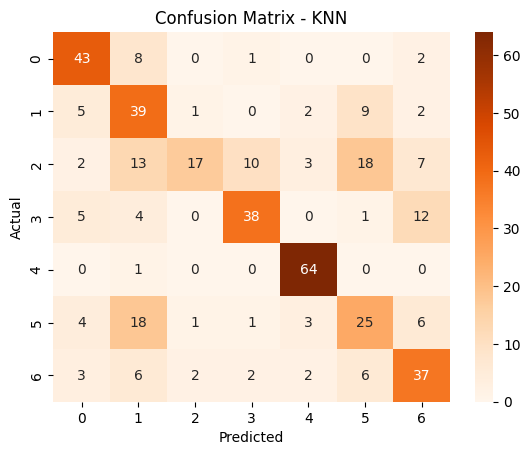

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Import model K-Nearest Neighbors (KNN)

knn = KNeighborsClassifier()                        # Inisialisasi model KNN dengan parameter default (n_neighbors=5)
knn.fit(X_resampled, y_resampled)                   # Melatih model KNN dengan data hasil SMOTE
y_pred_knn = knn.predict(X_test)                    # Memprediksi kelas dari data uji

# Evaluasi performa model
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))          # Menampilkan skor akurasi
print(classification_report(y_test, y_pred_knn))                   # Menampilkan precision, recall, dan f1-score

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn),                 # Membuat heatmap dari confusion matrix
            annot=True, fmt='d', cmap='Oranges')                  # Menampilkan angka, format integer, warna oranye
plt.title("Confusion Matrix - KNN")                                # Judul heatmap
plt.xlabel("Predicted")                                            # Label sumbu X
plt.ylabel("Actual")                                               # Label sumbu Y
plt.show()                                                         # Menampilkan heatmap


**Penjelasan :**

KNN bekerja dengan mencari k tetangga terdekat dari data yang akan diprediksi. Kode ini melatih model KNN, memprediksi hasil pada data uji, mengevaluasi performanya, dan memvisualisasikannya menggunakan confusion matrix berwarna oranye.

# **Membandingkan Model**

---



In [ ]:
models = {  # Dictionary untuk menyimpan beberapa model machine learning
    "Decision Tree": DecisionTreeClassifier(random_state=42),         # Model Decision Tree
    "Random Forest": RandomForestClassifier(random_state=42),         # Model Random Forest
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Model Logistic Regression dengan iterasi maksimum 1000
    "KNN": KNeighborsClassifier()                                     # Model K-Nearest Neighbors (default k=5)
}


**Penjelasan :**

Kode ini menyimpan berbagai model klasifikasi dalam satu dictionary bernama models. Nantinya, kamu bisa menggunakan struktur ini untuk melakukan training, evaluasi, atau perbandingan performa model secara efisien dalam loop.

In [ ]:
# Dictionary untuk menyimpan skor akurasi
model_scores = {}  # Digunakan untuk menyimpan hasil akurasi dari masing-masing model setelah evaluasi


**Penjelasan :**

Variabel model_scores akan digunakan untuk menyimpan nilai akurasi dari setiap model machine learning (seperti Decision Tree, Random Forest, dll) agar dapat dibandingkan dengan mudah di akhir evaluasi.

In [ ]:
# Label Encoding (for categorical columns)
le = LabelEncoder()                                         # Inisialisasi objek LabelEncoder

for col in df.select_dtypes(include='object').columns:      # Loop untuk setiap kolom bertipe kategorikal (object/string)
    df[col] = le.fit_transform(df[col])                     # Transformasi nilai kategorikal menjadi angka


**Penjelasan :**

Kode ini menggunakan Label Encoding untuk mengubah kolom kategorikal menjadi bentuk numerik yang dapat diproses oleh model machine learning. Setiap kategori unik akan diberi nilai integer secara otomatis.

In [ ]:
# Split Features and Target
X = df.drop("NObeyesdad", axis=1)  # Memisahkan fitur (semua kolom kecuali target 'NObeyesdad')
y = df["NObeyesdad"]               # Menyimpan target/label (kolom 'NObeyesdad') ke variabel y


**Penjelasan :**

Kode ini memisahkan fitur (X) dan target (y) dari DataFrame df. Ini merupakan langkah penting sebelum melakukan proses pelatihan model (training) agar model tahu mana data masukan dan mana label yang harus diprediksi.

In [ ]:
# Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(   # Membagi dataset menjadi data latih dan data uji
    X, y, test_size=0.2, random_state=42               # 80% data untuk training, 20% untuk testing, random_state untuk hasil konsisten
)

scaler = StandardScaler()                              # Inisialisasi StandardScaler untuk normalisasi (mean=0, std=1)
X_train = scaler.fit_transform(X_train)                # Fit dan transform data latih
X_test = scaler.transform(X_test)                      # Transform data uji menggunakan scaler yang sama


**Penjelasan :**

Langkah ini membagi data menjadi data latih dan uji serta melakukan normalisasi/standarisasi agar semua fitur berada pada skala yang sama, yang penting untuk model seperti KNN dan Logistic Regression.

In [ ]:
# Tambahan import
from sklearn.neighbors import KNeighborsClassifier  # Import model K-Nearest Neighbors (KNN)

# Tambahkan KNN ke dalam model dictionary
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),                      # Model Decision Tree
    'Random Forest': RandomForestClassifier(random_state=42),                      # Model Random Forest
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=10000, random_state=42),  # Logistic Regression dengan solver 'liblinear'
    'KNN': KNeighborsClassifier(n_neighbors=5)                                     # Model KNN dengan 5 tetangga terdekat
}


**Penjelasan :**

Kode ini memperluas dictionary models dengan menambahkan model KNN, serta menggunakan parameter eksplisit seperti n_neighbors=5 dan solver='liblinear' untuk Logistic Regression agar mendukung data kategori multikelas kecil hingga sedang. Ini mempermudah proses pelatihan dan evaluasi beberapa model sekaligus.

In [ ]:
# Buat imputasi (isi NaN dengan mean kolom)
imputer = SimpleImputer(strategy='mean')

# Terapkan imputasi ke data train dan test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train dan evaluasi model
model_scores = {}
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Decision Tree Accuracy: 0.9102
Random Forest Accuracy: 0.9433
Logistic Regression Accuracy: 0.6478
KNN Accuracy: 0.7352


**Penjelasan :**
Kode ini melakukan pelatihan dan evaluasi otomatis untuk setiap model dalam models. Hasil evaluasi berupa akurasi disimpan ke dalam dictionary model_scores dan ditampilkan ke layar. Ini memudahkan perbandingan performa antar model.

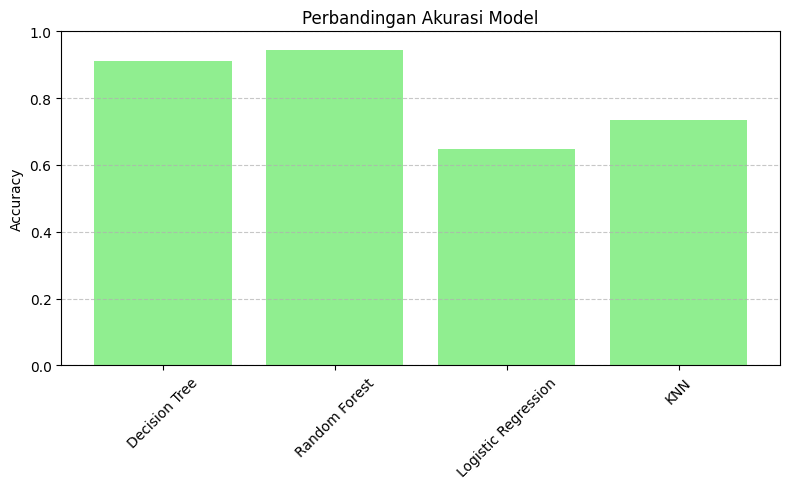

In [ ]:
# Visualize Results
plt.figure(figsize=(8,5))
plt.bar(model_scores.keys(), model_scores.values(), color='lightgreen')
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Penjelasan:**

Kode ini digunakan untuk memvisualisasikan akurasi dari setiap model dalam bentuk diagram batang, sehingga memudahkan perbandingan performa antar model klasifikasi.

# **Hyper Tuning**

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier                 # Import model Decision Tree
from sklearn.model_selection import GridSearchCV                # Import GridSearchCV untuk tuning hyperparameter

# Definisikan parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],                              # Kedalaman maksimum pohon (None = tidak dibatasi)
    'min_samples_split': [2, 5, 10],                            # Minimum jumlah sampel untuk membagi internal node
    'min_samples_leaf': [1, 2, 4],                              # Minimum jumlah sampel di daun (leaf)
    'criterion': ['gini', 'entropy']                            # Metode untuk mengukur kualitas split
}


**Penjelasan :**

Kode ini mendefinisikan grid parameter untuk Decision Tree, yang akan digunakan oleh GridSearchCV untuk mencari kombinasi parameter terbaik guna meningkatkan akurasi model.

In [ ]:
# Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)  # Membuat instance Decision Tree dengan seed random agar hasilnya konsisten


**Penjelasan :**

Kode ini menginisialisasi model Decision Tree Classifier dengan parameter random_state=42 untuk memastikan hasil pelatihan yang reproducible (selalu sama setiap dijalankan). Model ini nanti akan digunakan dalam GridSearchCV.

In [ ]:
# Grid search dengan 5-fold cross-validation
grid_search = GridSearchCV(                                          # Inisialisasi GridSearchCV
    dt,                                                             # Model dasar: Decision Tree
    param_grid,                                                     # Grid parameter yang akan diuji
    cv=5,                                                           # Gunakan 5-fold cross-validation
    scoring='accuracy',                                             # Metrik evaluasi: akurasi
    n_jobs=-1                                                       # Gunakan semua core CPU untuk mempercepat proses
)


**Penjelasan :**

GridSearchCV akan melakukan pencarian kombinasi parameter terbaik untuk model Decision Tree berdasarkan akurasi, dengan membagi data menjadi 5 bagian (5-fold cross-validation). Opsi n_jobs=-1 memastikan proses berjalan lebih cepat dengan memanfaatkan semua inti CPU.

In [ ]:
# Fit ke data
grid_search.fit(X_train, y_train)  # Melatih GridSearchCV untuk mencari parameter terbaik dengan data latih


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

**Penjelasan :**
Kode ini menjalankan proses pencarian parameter terbaik untuk model Decision Tree menggunakan data pelatihan (X_train, y_train). GridSearchCV akan menguji semua kombinasi parameter dari param_grid menggunakan 5-fold cross-validation.

In [ ]:
# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)  # Menampilkan kombinasi parameter terbaik yang ditemukan GridSearchCV
print("Best Score:", grid_search.best_score_)        # Menampilkan skor akurasi tertinggi dari hasil cross-validation


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9212157392938037


**Penjelasan :**

Kode ini digunakan untuk menampilkan parameter terbaik dan akurasi tertinggi yang diperoleh selama proses Grid Search menggunakan cross-validation. Ini membantu memilih konfigurasi Decision Tree yang paling optimal.

In [ ]:
best_dt = grid_search.best_estimator_              # Mengambil model Decision Tree terbaik dari hasil Grid Search

# Evaluasi di test set
y_pred_dt = best_dt.predict(X_test)                # Menggunakan model terbaik untuk memprediksi data uji
acc_dt = accuracy_score(y_test, y_pred_dt)         # Menghitung akurasi prediksi terhadap data uji
print("Test Accuracy (Tuned Decision Tree):", acc_dt)  # Menampilkan akurasi model terbaik di data uji


Test Accuracy (Tuned Decision Tree): 0.9267139479905437


**Penjelasan :**

Setelah menemukan konfigurasi terbaik, model digunakan untuk prediksi pada data uji. Kemudian dihitung akurasinya untuk mengetahui seberapa baik model yang sudah di-tuning bekerja terhadap data yang belum pernah dilihat